In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# Load themnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape,"x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,) x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [32]:
np.random.seed(0)

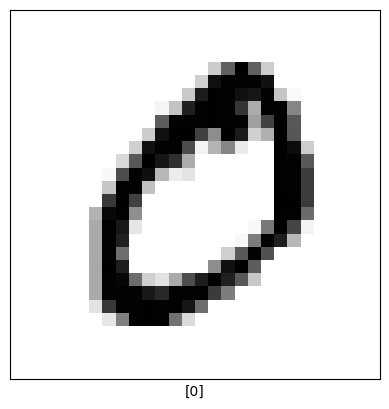

In [33]:
# Show one of the images from the training dataset
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[1]])
plt.imshow(x_train[1],cmap=plt.cm.binary)

In [34]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255



In [35]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 7, 7, 32)         

In [36]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [37]:
x_train = x_train.reshape(-1,28, 28,1)#Reshape for CNN 
x_test = x_test.reshape(-1,28, 28, 1)


In [38]:
model_log=model.fit(x_train, y_train,
          batch_size=60,
          epochs=10,
          verbose=1,
          validation_split=.3)
#shit gpu 90+ % on google collab

Epoch 1/10
700/700 [==============================] - 24s 33ms/step - loss: 0.3743 - accuracy: 0.8822 - val_loss: 0.1137 - val_accuracy: 0.9665
Epoch 2/10
700/700 [==============================] - 21s 29ms/step - loss: 0.1455 - accuracy: 0.9541 - val_loss: 0.0750 - val_accuracy: 0.9766
Epoch 3/10
700/700 [==============================] - 25s 35ms/step - loss: 0.1077 - accuracy: 0.9665 - val_loss: 0.0656 - val_accuracy: 0.9799
Epoch 4/10
700/700 [==============================] - 20s 28ms/step - loss: 0.0901 - accuracy: 0.9719 - val_loss: 0.0515 - val_accuracy: 0.9846
Epoch 5/10
700/700 [==============================] - 19s 27ms/step - loss: 0.0823 - accuracy: 0.9748 - val_loss: 0.0499 - val_accuracy: 0.9843
Epoch 6/10
700/700 [==============================] - 19s 28ms/step - loss: 0.0708 - accuracy: 0.9773 - val_loss: 0.0460 - val_accuracy: 0.9858
Epoch 7/10
700/700 [==============================] - 19s 28ms/step - loss: 0.0639 - accuracy: 0.9798 - val_loss: 0.0427 - val_accuracy:

In [39]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9876999855041504


In [40]:
predictions = model.predict(x_test)
predictions[0]

313/313 [==============================] - 2s 5ms/step


array([6.5271566e-10, 6.7007107e-08, 3.4077555e-06, 3.8293092e-06,
       1.7690030e-10, 1.9303108e-10, 4.0187622e-15, 9.9997890e-01,
       4.2557775e-09, 1.3818531e-05], dtype=float32)

In [41]:
np.argmax(predictions[0])

7

In [42]:
x_test = x_test.reshape(-1,28, 28)
x_test.shape

(10000, 28, 28)

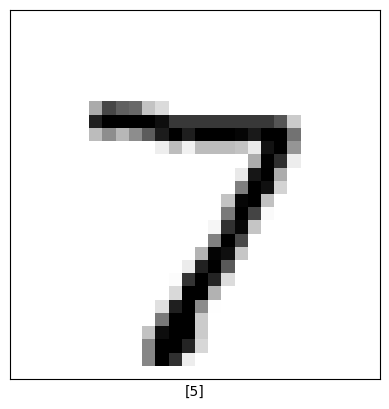

In [43]:
# Show one of the images from the test dataset
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[0]])
plt.imshow(x_test[0],cmap=plt.cm.binary)


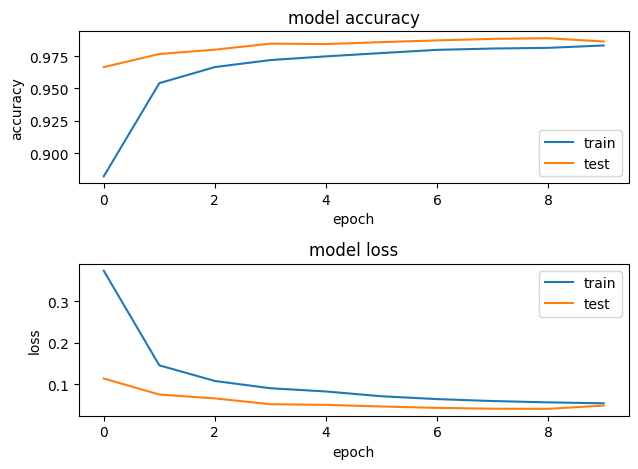

In [44]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()



In [45]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format([predicted_label],
                                100*np.max(predictions_array),
                                [true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

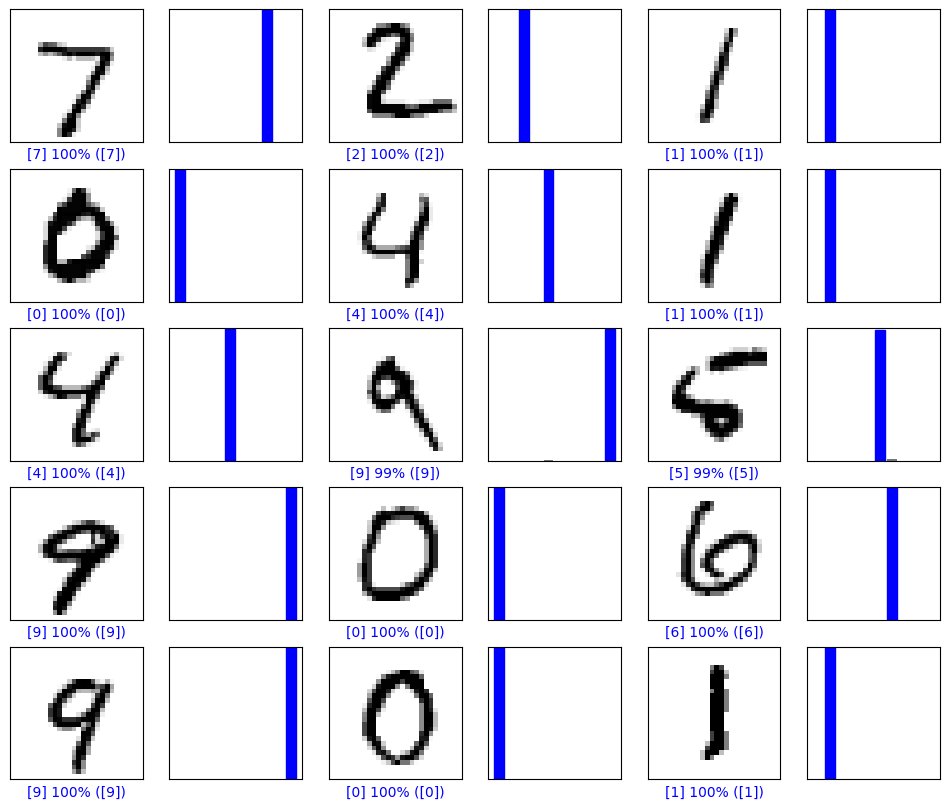

In [46]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()